In [4]:
from __future__ import division
import pymongo
import pandas as pd
import numpy as np
import csv
import os
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import time
from dateutil.parser import parse
import GetCluster
import GetEDA
%matplotlib inline

# Flight Track Database

In [20]:
# client = pymongo.MongoClient()
# db = client.EnRoute
# collection1 = db.ETMS2014_core2core

In [211]:
# collection1.drop()

# ETMS database

In [2]:
client = pymongo.MongoClient()
db = client.EnRoute
collection = db.ETMS2013_core2core

# IAH_BOS

In [5]:
st = time.time()
iah_bos = GetEDA.EDA_Data('IAH','BOS',2013, InputData=True) 
# If you have MongoDB connection and it is the first time you run the code for a OD pair, you need to specify
# InputData = False. However, since FAA is using Oracle, I suggest you to adapt the MongoDB part to Oracle accordingly.
print time.time() - st


Inefficiency File Loaded
Valid Track File Loaded
1.55841493607


In [6]:
# Identify the FID of flights with holding patterns.
Holding = []
for gpidx, gp in iah_bos.VTrack.groupby('FID'):
    if LineString(gp[['Lon','Lat']].values).is_simple:
        pass
    else:
        Holding.append(gpidx)
print(len(Holding))

39


/Users/lyn/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/lyn/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


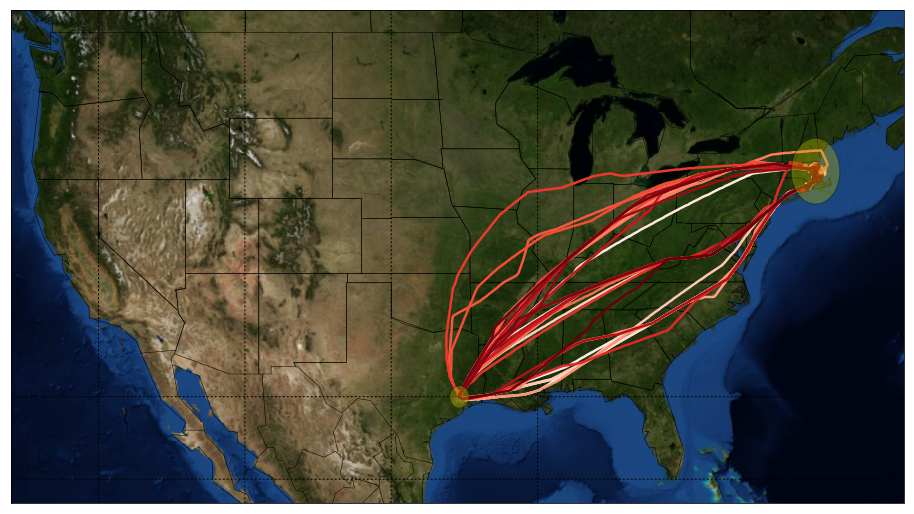

In [7]:
dfig = iah_bos.PlotWithID(FID_set=Holding)
plt.show()

/Users/lyn/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/lyn/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


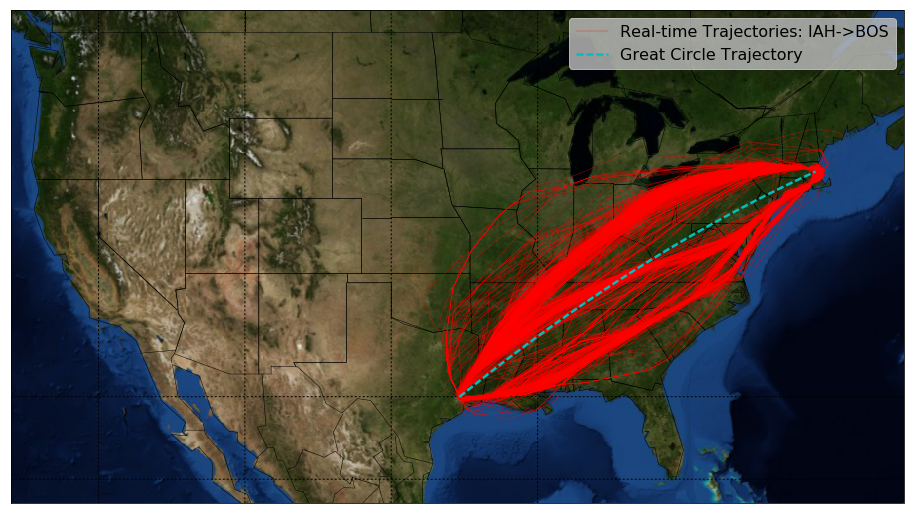

In [8]:
fig = iah_bos.Visualization(PR = False, CDR = False, CoreAirport = False, Timeframe = 'All', QuickDraw=False)

In [16]:
fig.savefig('IAH_BOS_Visualization.png', dpi = 120)
# iah_bos.SaveData()

Cluster

In [32]:
reload(GetCluster)

<module 'GetCluster' from 'GetCluster.py'>

[ 0.91775795  0.05382107  0.01611793  0.00451916]
0.992216114862


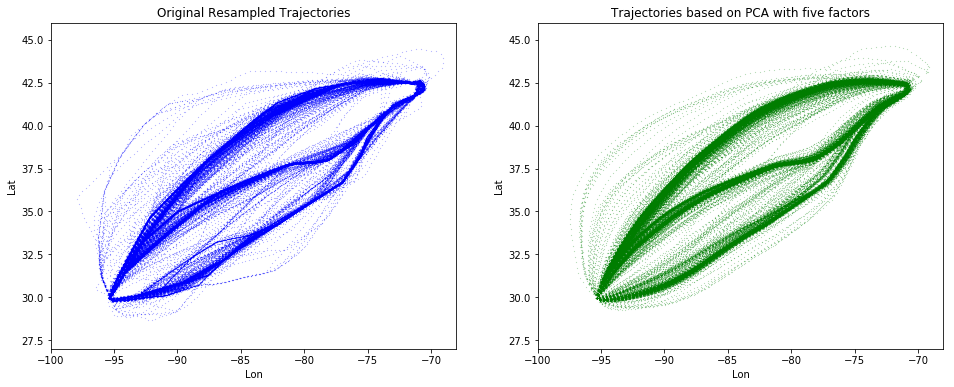

In [10]:
T1 = GetCluster.Traj_Clustering('IAH','BOS',2013,N_Comp=4)
T1.Plot_PCA_Int(xlb = -100,xrb = -68, ylb = 27,yub = 46)

Estimated number of clusters: 5
(0, 'r', 0.36212030970815962, 3.8008767287829017)
The average travel time is 3.20 hours

(1, 'g', 0.25253126861226921, 6.142076887490079)
The average travel time is 3.25 hours

(2, 'm', 0.30553901131625966, 2.8371173525904405)
The average travel time is 3.16 hours

(3, 'c', 0.009529481834425254, 1.7632746929444678)
The average travel time is 3.19 hours

(4, 'b', 0.011316259678379988, 3.261651320695793)
The average travel time is 3.21 hours

(-1, 'k', 0.058963668850506253, 8.781942349741612)


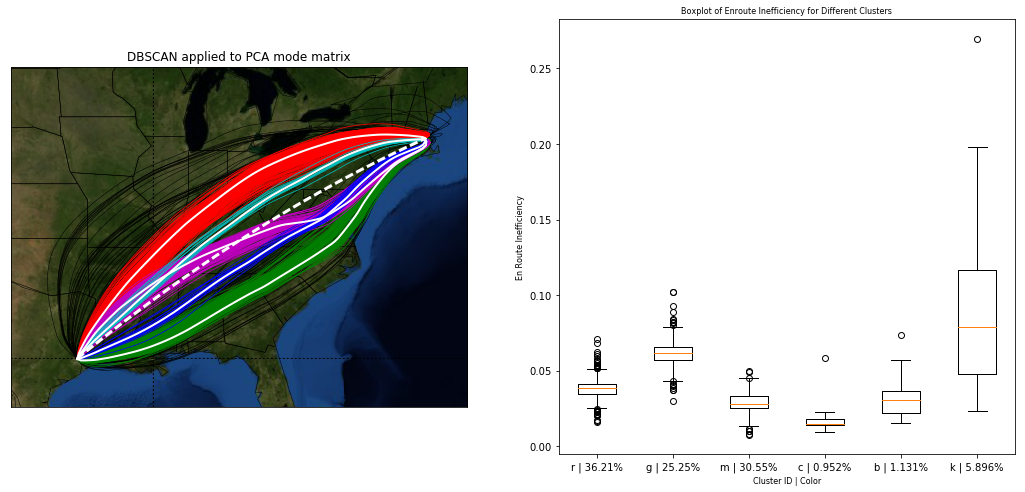

In [11]:
# Other methods are also hard coded:
# 1. K-means
# 2. Mean-Shift
# 3. Spectral
# Please refer to the source code of GetCluster.py for additional info.
LBdata1, fig1 = T1.DB_Clustering(3,12, SAVE=False, MEDIAN=True, QuickDraw=False)

In [28]:
fig1.savefig(os.getcwd() + '/VisualizingResults/IAH_BOS_Cluster.png',dpi = 300)